In [ ]:
import pandas as pd
import numpy as np

def month_to_cat(s: pd.Series):
    dict = {'January': '1',
            'February': '2',
            'March': '3',
            'May': '5',
            'April': '4',
            'June': '6',
            'July': '7',
            'August': '8',
            'September': '9',
            'October': '10',
            'November': '11',
            'December': '12'
            }
    for i in s.index:
        s[i] = dict[s[i]]
    return s


def to_category_disp(df: pd.DataFrame, col_list: list):
    for i in col_list:
        dict = {}
        df[i] = df[i].astype('category')
        c = df[i].cat.categories
        df[i] = df[i].cat.codes
        for _, v in enumerate(list(c)):
            dict[_] = v
        print(f'{i} to categories: ', dict)

#read data
df = pd.read_csv('hotel_bookings.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(df.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  \
0                        27                          1                        0   
1                        27                          1                        0   
2                        27                          1                        0   
3                        27                          1                        0   
4                        27                          1                        0   

   stays_in_we

In [ ]:
print(df.isnull().sum())
df = df[~(df['country'].isna())] # удялем пропущенные страны
df = df.drop(columns=['company']) # удаляем столбец 'company' - слишком много na значений (112k/119k)
df = df[~(df['children'].isna())] # удаляем пропущенных детей..

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
for i in df.columns:
  print(df[i].value_counts())
df = df[((df['distribution_channel'] != 'Undefined') & (df['market_segment'] != 'Undefined'))] #удаляем  значения undefined (их очень мало - они не нужны)

hotel
City Hotel      79302
Resort Hotel    39596
Name: count, dtype: int64
is_canceled
0    74745
1    44153
Name: count, dtype: int64
lead_time
0      6223
1      3393
2      2033
3      1802
4      1696
       ... 
400       1
370       1
532       1
371       1
463       1
Name: count, Length: 479, dtype: int64
arrival_date_year
2016    56435
2017    40604
2015    21859
Name: count, dtype: int64
arrival_date_month
August       13852
July         12628
May          11779
October      11095
April        11045
June         10927
September    10467
March         9739
February      8012
November      6752
December      6728
January       5874
Name: count, dtype: int64
arrival_date_week_number
33    3571
30    3080
32    3039
34    3038
18    2909
21    2849
28    2845
17    2804
20    2783
29    2757
42    2734
31    2732
41    2692
15    2673
25    2659
27    2657
38    2655
23    2617
35    2590
39    2573
22    2546
24    2495
13    2408
16    2401
19    2399
40    2391
26    2390
43

In [ ]:
#clear data
df = df.fillna(value=0)
i = df[df['meal'] == 'Undefined']['meal'].index
df.loc[i,['meal']] = 'SC' #undefined and sc = no meal
to_category_disp(df, ['meal', 'country', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status',
                      'market_segment','reserved_room_type','assigned_room_type','hotel']) #переводим все строковые значения в категории (кроме даты)
df['arrival_date_month'] = month_to_cat(df['arrival_date_month'].copy())  # перевели месяца в категории в нужном порядке



meal to categories:  {0: 'BB', 1: 'FB', 2: 'HB', 3: 'SC'}
country to categories:  {0: 'ABW', 1: 'AGO', 2: 'AIA', 3: 'ALB', 4: 'AND', 5: 'ARE', 6: 'ARG', 7: 'ARM', 8: 'ASM', 9: 'ATA', 10: 'ATF', 11: 'AUS', 12: 'AUT', 13: 'AZE', 14: 'BDI', 15: 'BEL', 16: 'BEN', 17: 'BFA', 18: 'BGD', 19: 'BGR', 20: 'BHR', 21: 'BHS', 22: 'BIH', 23: 'BLR', 24: 'BOL', 25: 'BRA', 26: 'BRB', 27: 'BWA', 28: 'CAF', 29: 'CHE', 30: 'CHL', 31: 'CHN', 32: 'CIV', 33: 'CMR', 34: 'CN', 35: 'COL', 36: 'COM', 37: 'CPV', 38: 'CRI', 39: 'CUB', 40: 'CYM', 41: 'CYP', 42: 'CZE', 43: 'DEU', 44: 'DJI', 45: 'DMA', 46: 'DNK', 47: 'DOM', 48: 'DZA', 49: 'ECU', 50: 'EGY', 51: 'ESP', 52: 'EST', 53: 'ETH', 54: 'FIN', 55: 'FJI', 56: 'FRA', 57: 'FRO', 58: 'GAB', 59: 'GBR', 60: 'GEO', 61: 'GGY', 62: 'GHA', 63: 'GIB', 64: 'GLP', 65: 'GNB', 66: 'GRC', 67: 'GTM', 68: 'GUY', 69: 'HKG', 70: 'HND', 71: 'HRV', 72: 'HUN', 73: 'IDN', 74: 'IMN', 75: 'IND', 76: 'IRL', 77: 'IRN', 78: 'IRQ', 79: 'ISL', 80: 'ISR', 81: 'ITA', 82: 'JAM', 83: 'JEY', 84: 

In [ ]:
print(df.duplicated().sum()) #проверяем есть ли дубликаты записей
df = df.drop_duplicates()  #удаляем дубликаты
print(df.duplicated().sum())

31965
0


In [ ]:
#узнаем прибыль с каждого клиента
df['nights_total'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['earnings'] = df['nights_total']*df['adr']


In [ ]:
# columns describe

# hotel : Отель. 1 = Курортный отель или 0 = Городской отель
# is_canceled : Значение, указывающее, было ли бронирование отменено (1) или нет (0)
# lead_time : Количество дней, прошедших между датой ввода бронирования в PMS и датой прибытия.
# arrival_date_year : Год прибытия
# arrival_date_month : Месяц прибытия
# arrival_date_week_number : Неделя прибытия (по счету в году)
# arrival_date_day_of_month : Число прибытия
# stays_in_weekend_nights : Количество ночей выходного дня (суббота или воскресенье), которые гость провел или забронировал для проживания в отеле.
# stays_in_week_nights : Количество будних ночей в неделю (с понедельника по пятницу), в течение которых гость останавливался или забронировал проживание в отеле
# adults : Кол-во взрослых
# children : Кол-во детей
# babies : Кол-во младенцев
# meal : Тип забронированного питания. BB(Bed and Breakfast) - только завтрак; HB (Half Board) - завтрак и обед ИЛИ завтрак и ужин; FB (Full Board) - трехразовое питание; SC/undefined - нет еды
# country : Страна происхождения. Категории представлены в формате ISO 3155–3:2013
# market_segment : Обозначение сегмента рынка. В категориях термин «ТА» означает «Турагенты», а «ТО» означает «Туроператоры»
# distribution_channel : Канал распространения бронирования. Термин «ТА» означает «Турагенты», а «ТО» означает «Туроператоры»
# is_repeated_guest : Гость был ранее или впервые
# previous_cancellations : Количество предыдущих бронирований, которые были отменены клиентом до текущего бронирования
# previous_bookings_not_canceled : Количество предыдущих бронирований, не отмененных клиентом до текущего бронирования
# reserved_room_type : Код типа зарезервированного номера. Код указан вместо типа для анонимности
# assigned_room_type : Код типа номера, назначенного для бронирования. Иногда назначенный тип номера отличается от зарезервированного по причинам работы отеля (например, из-за перебронирования) или по желанию клиента. Код представлен вместо обозначения в целях анонимности.
# booking_changes : Количество изменений/дополнений, внесенных в бронирование с момента ввода бронирования в PMS до момента заезда или отмены.

# deposit_type : Индикация того, внес ли клиент депозит для гарантии бронирования. Эта переменная может принимать три категории: No Deposit – депозит не был внесен;
# Non Refund (не возвратный) – был внесен депозит в размере общей стоимости проживания; Refundable – был внесен депозит на сумму ниже общей стоимости проживания.

# agent : ID туристического агентства, осуществившего бронирование
# days_in_waiting_list : Количество дней, в течение которых бронирование находилось в списке ожидания до того, как оно было подтверждено клиенту

# customer_type : Тип бронирования, предполагающий одну из четырех категорий: Contract — когда с бронированием связано выделение или другой тип контракта; Group  – когда бронирование привязано к группе;
# Transient – когда бронирование не является частью группы или договора и не связано с другим временным бронированием; Transient-party – когда бронирование является временным, но связано как минимум с другим временным бронированием.

# adr : Средняя дневная ставка, определяемая путем деления суммы всех транзакций с проживанием на общее количество ночей проживания.
# required_car_parking_spaces : Количество парковочных мест, необходимое заказчику
# total_of_special_requests : Количество особых запросов клиента (например, две односпальные кровати или верхний этаж)
# reservation_status : Последний статус бронирования, принимающий одну из трех категорий: Canceled – бронирование отменено клиентом; Check-Out – клиент зарегистрировался, но уже уехал; No-Show – клиент не зарегистрировался и не сообщил о причине.
# reservation_status_date : Дата, когда был установлен последний статус. Эту переменную можно использовать вместе с ReservationStatus, чтобы понять, когда было отменено бронирование или когда клиент выписался из отеля.


<Axes: >

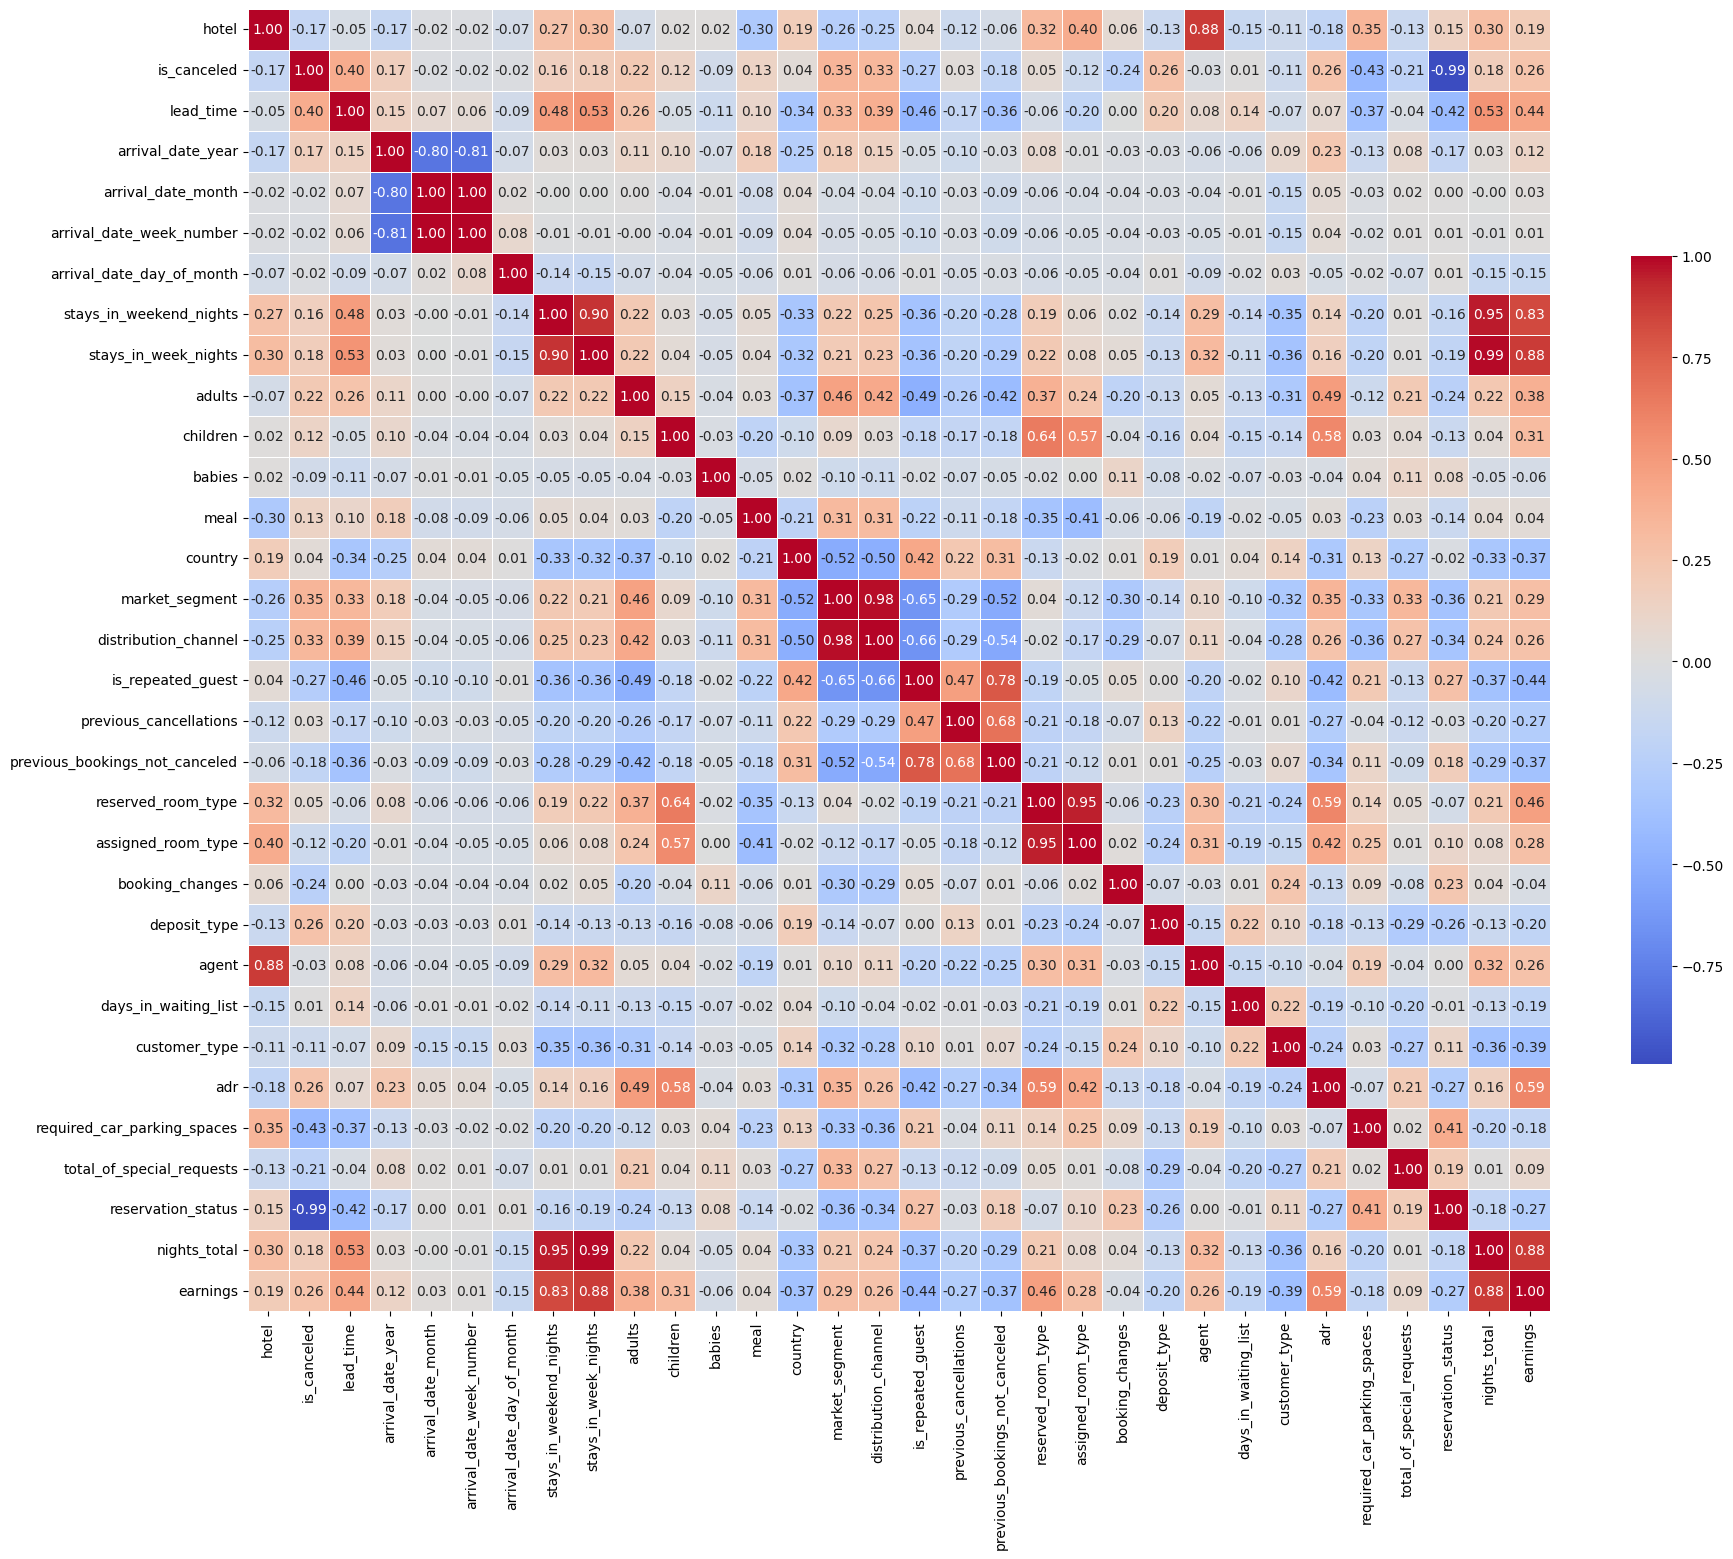

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

df1 = df.drop(columns=['reservation_status_date'], axis=1) #убираем дату чтобы построить корелляционную матрицу
plt.figure(figsize=(21, 21))
corr_matrix = df1.corr()
sns.heatmap(corr_matrix.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

(86932, 34)


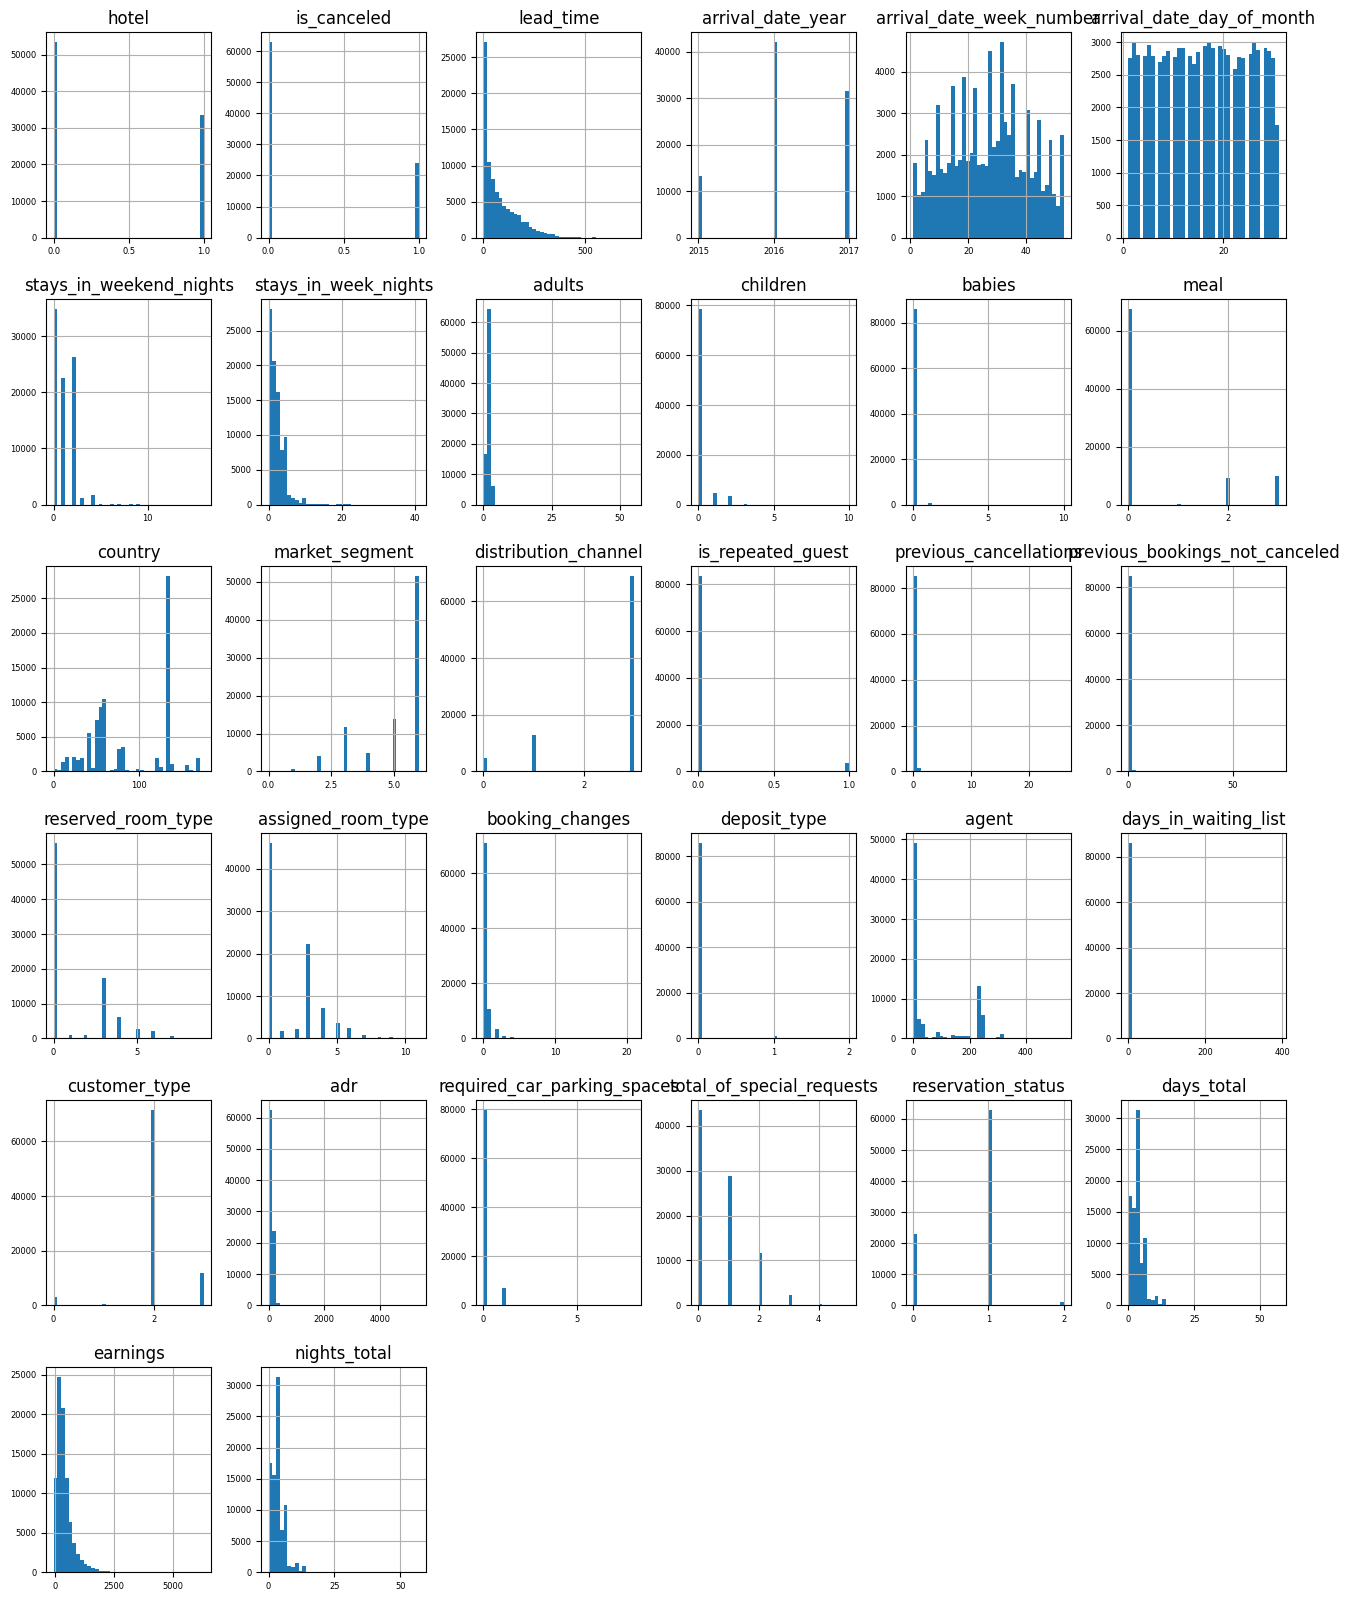

In [ ]:
#визуализация
df.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6) #количественное распределение данных
print(df.shape)

<ipython-input-197-5cc27c7ec522>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = sum_adr, palette='pastel')
<ipython-input-197-5cc27c7ec522>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = mean_adr , palette='pastel')


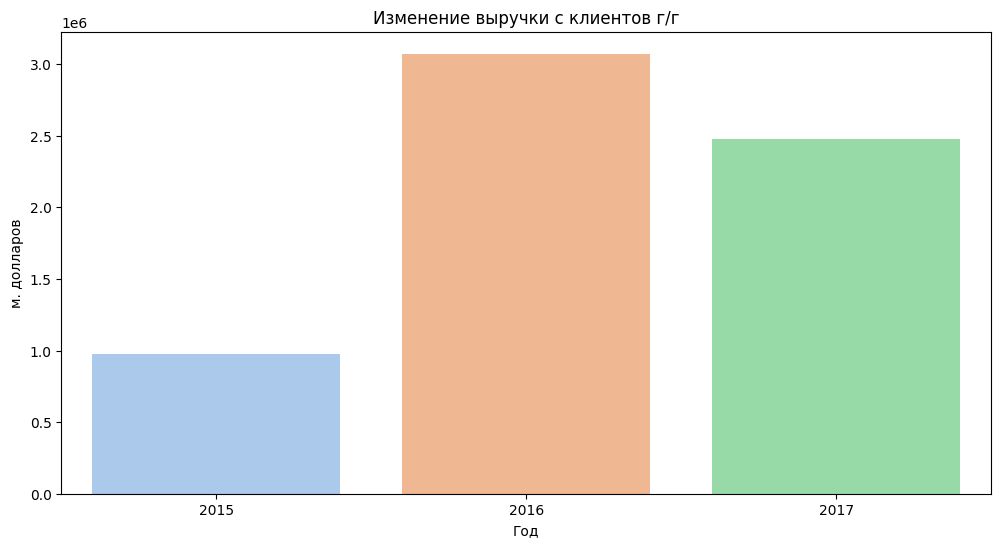

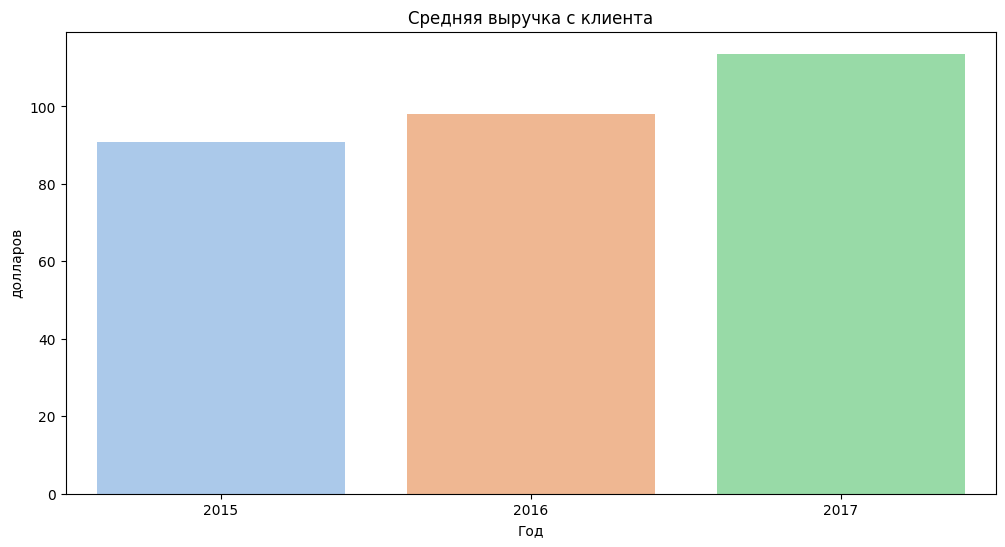

In [ ]:
#покажем динамику данных о выручку г/г   #!!!! добавить разделение по отелям
df_adr = df[((df['deposit_type'] == 1) | (df['is_canceled'] == 0))] #берем только выручку с невозвратных депозиты И выручку с не отмененных броней (иначе получим сумму вместе с отмененными деньгами)
df_group = df_adr.groupby(by='arrival_date_year')
plt.figure(figsize=(12,6))
sum_adr = df_group['adr'].sum() #суммарная выручка по годам
ax = sns.barplot(data = sum_adr, palette='pastel')
plt.title('Изменение выручки с клиентов г/г')
ax.set(xlabel = 'Год', ylabel = 'м. долларов')

plt.figure(figsize=(12,6))
mean_adr = df[((df['is_canceled'] == 0) | (df['deposit_type'] == 1))].groupby(by = 'arrival_date_year')['adr'].mean() #средняя выручка среди клиентов без отмены бронирования ИЛИ с невозвратным депозитом
ax = sns.barplot(data = mean_adr , palette='pastel')
plt.title('Средняя выручка с клиента')
ax.set(xlabel = 'Год', ylabel = 'долларов')

df_group = df.groupby(by='arrival_date_year')

[Text(0.5, 0, 'Год'), Text(0, 0.5, 'кол-во, шт')]

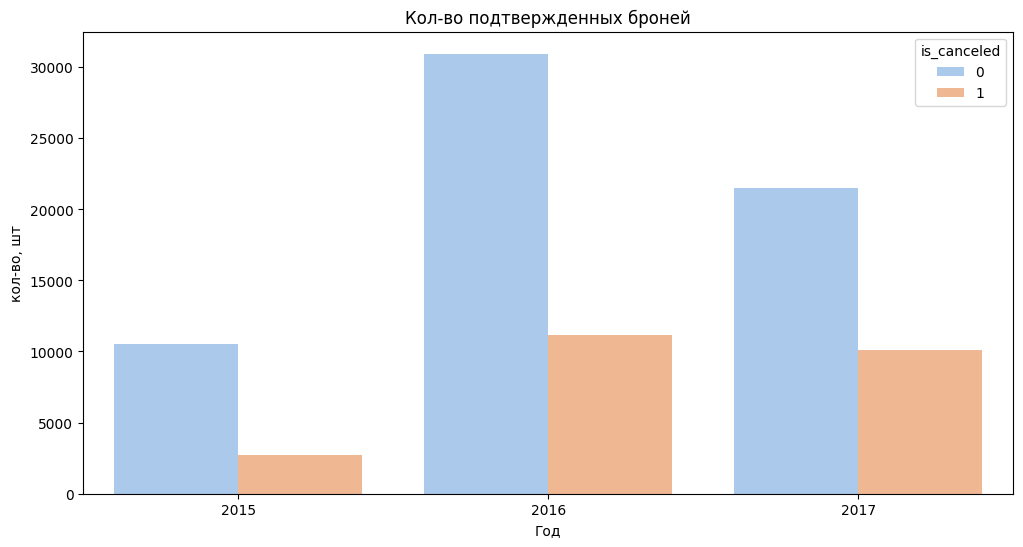

In [ ]:
#визуализируем кол-во броней и отношение подтвержденных и отмененных броней г/г, а также за все время
plt.figure(figsize=(12,6))
canceled_counts = df_group['is_canceled'].value_counts().reset_index()
ax = sns.barplot(x='arrival_date_year', y='count', hue='is_canceled', data = canceled_counts , palette='pastel')
plt.title('Кол-во подтвержденных броней')
ax.set(xlabel = 'Год', ylabel = 'кол-во, шт')


<ipython-input-199-5f1517adfbd7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = canceled_percent, palette = 'pastel')


[Text(0.5, 0, 'Год'), Text(0, 0.5, 'Процент %')]

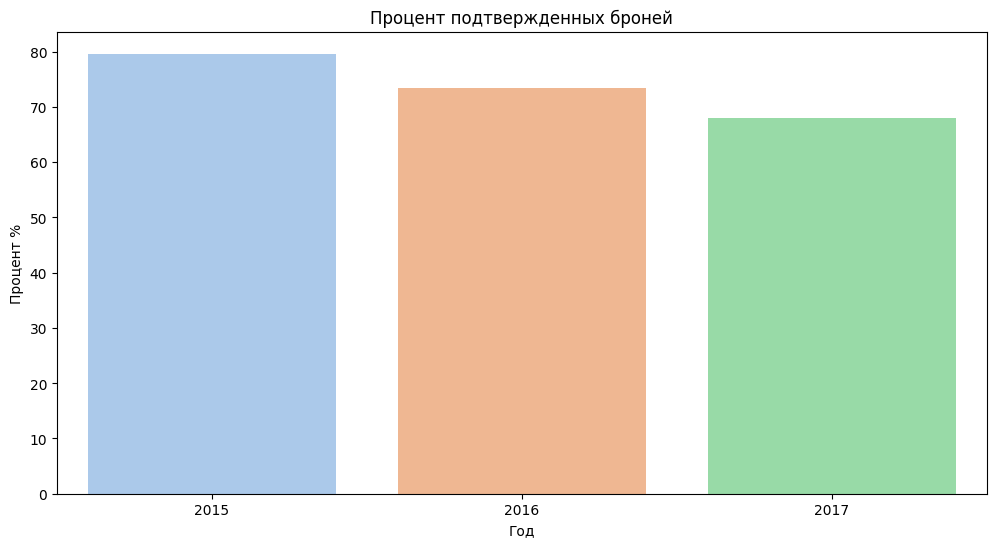

In [ ]:
plt.figure(figsize=(12,6))
total_bookings = canceled_counts.groupby(by='arrival_date_year')['count'].sum().reset_index()
not_canceled_bookings = canceled_counts[canceled_counts['is_canceled'] == 0].reset_index()
canceled_percent = not_canceled_bookings['count']*100 /  total_bookings['count']
canceled_percent.index = not_canceled_bookings['arrival_date_year'] #сделали индекс годом (прим.: необходимо соответствие индексов в объектах)
ax = sns.barplot(data = canceled_percent, palette = 'pastel')
plt.title('Процент подтвержденных броней')
ax.set(xlabel = 'Год', ylabel = 'Процент %')

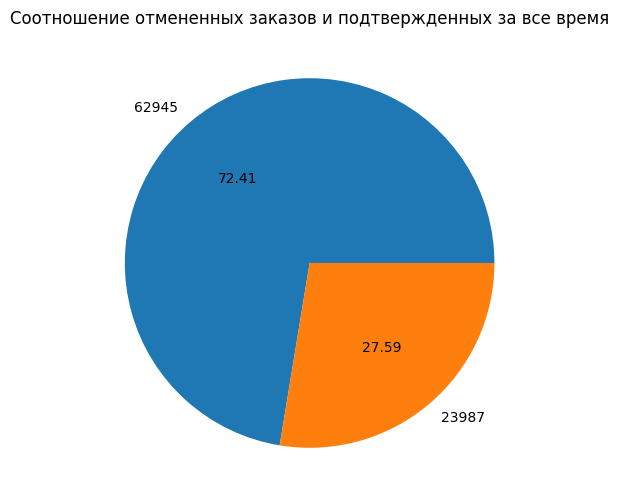

In [ ]:
plt.figure(figsize=(12,6))
plt.pie(df.groupby(by=["is_canceled"]).size(), labels = df["is_canceled"].value_counts(), autopct = "%0.2f")
plt.title('Соотношение отмененных заказов и подтвержденных за все время');

    arrival_date_month  arrival_date_year         hotel  is_canceled  count
0                    1               2016    city hotel            0    816
1                    1               2016    city hotel            1    214
2                    1               2016  resort hotel            0    699
3                    1               2016  resort hotel            1     87
4                    1               2017    city hotel            0   1150
..                 ...                ...           ...          ...    ...
99                   9               2015  resort hotel            1    246
100                  9               2016    city hotel            0   1814
101                  9               2016    city hotel            1    753
102                  9               2016  resort hotel            0    949
103                  9               2016  resort hotel            1    323

[104 rows x 5 columns]


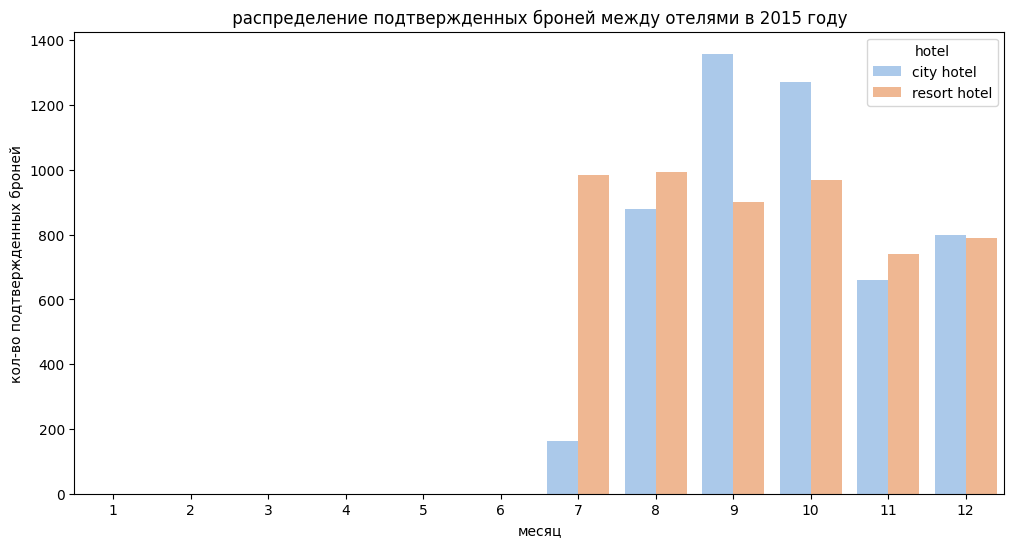

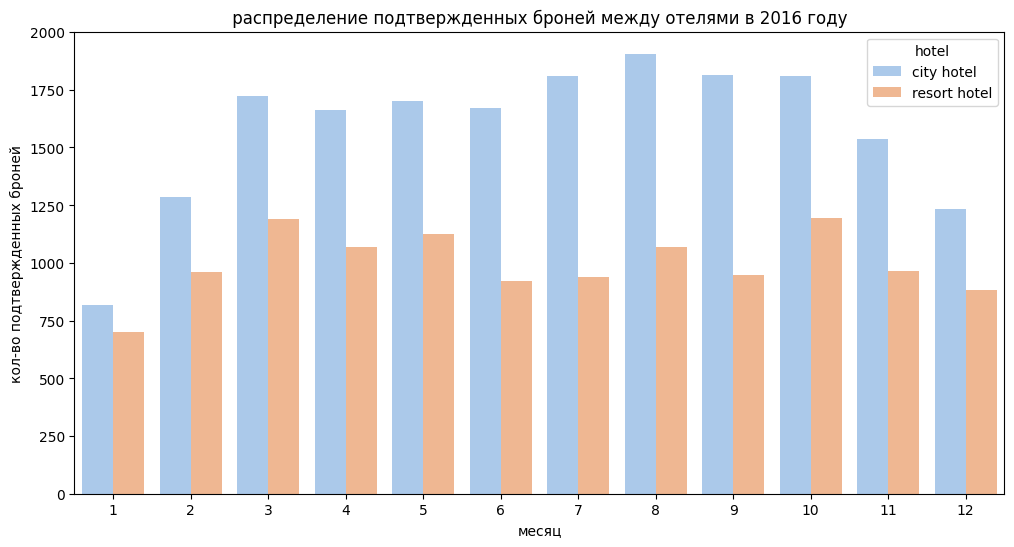

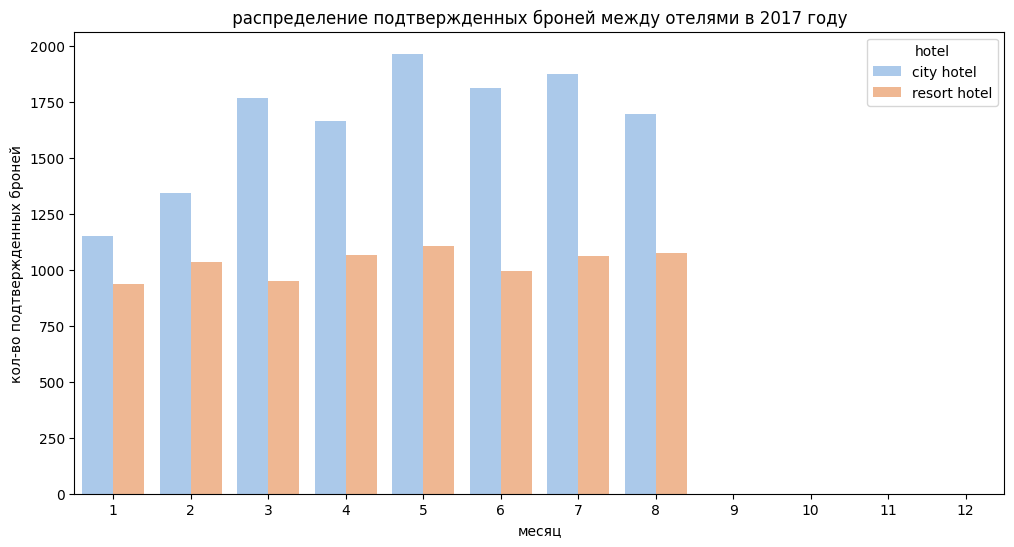

In [ ]:
#посмотрим на распределение броней между отелями в различные года и времена года

df2 = df1.groupby(by=['arrival_date_month','arrival_date_year','hotel'])['is_canceled'].value_counts().reset_index() #группируем данные чтобы получить кол-во подтвержденных броней за каждый месяц и год в каждом отеле

month_order = []
for n in range(1,13,1):
  month_order.append(str(n))

df2['hotel'] = df2['hotel'].replace({0:'city hotel',1: 'resort hotel'})
for i in df1['arrival_date_year'].unique():
  plt.figure(figsize=(12,6))
  plt.title(f' распределение подтвержденных броней между отелями в {i} году ');
  df_loc = df2[((df2['arrival_date_year'] == i) & (df2['is_canceled'] == 0))]
  ax = sns.barplot(x = 'arrival_date_month', y = 'count', hue = 'hotel',data = df_loc, palette = 'pastel', order = month_order)
  ax.set(xlabel='месяц', ylabel= 'кол-во подтвержденных броней')

In [ ]:
#распределение по медиа группам (откуда пришли кто привел)
#отношение постоянных гостей к новым г/г

#статистические гипотезы

#пару мл моделей

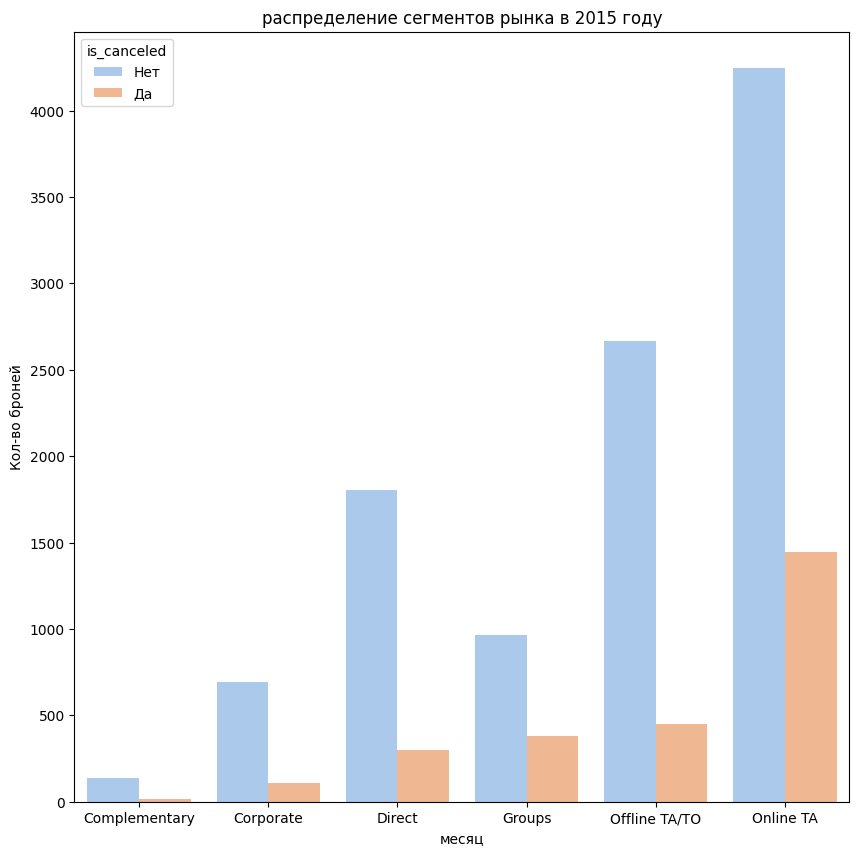

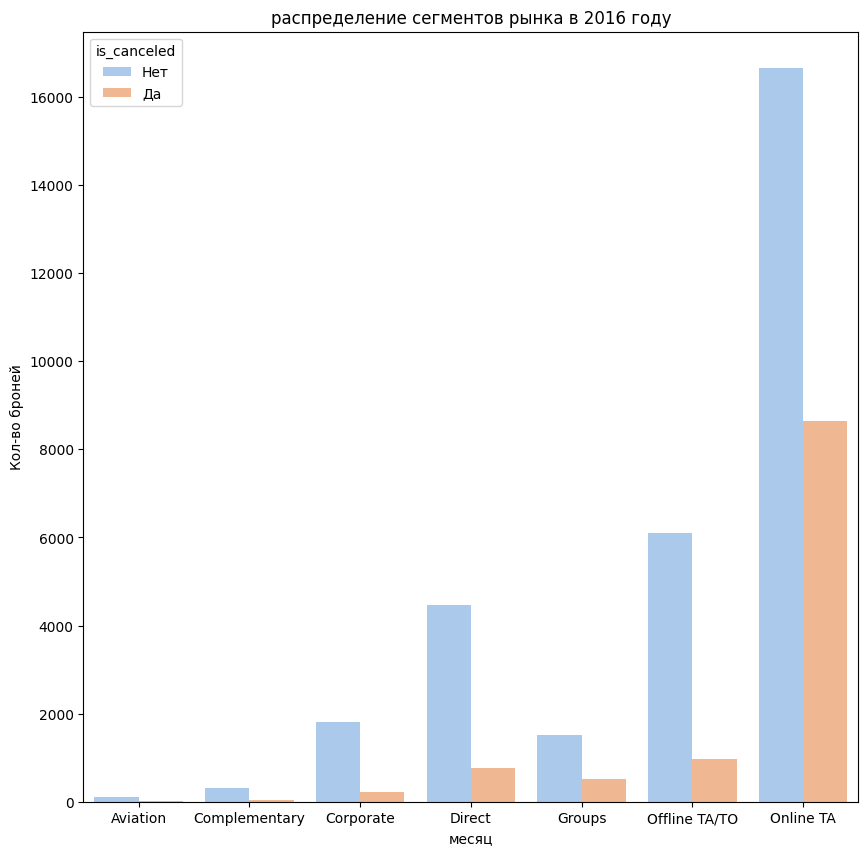

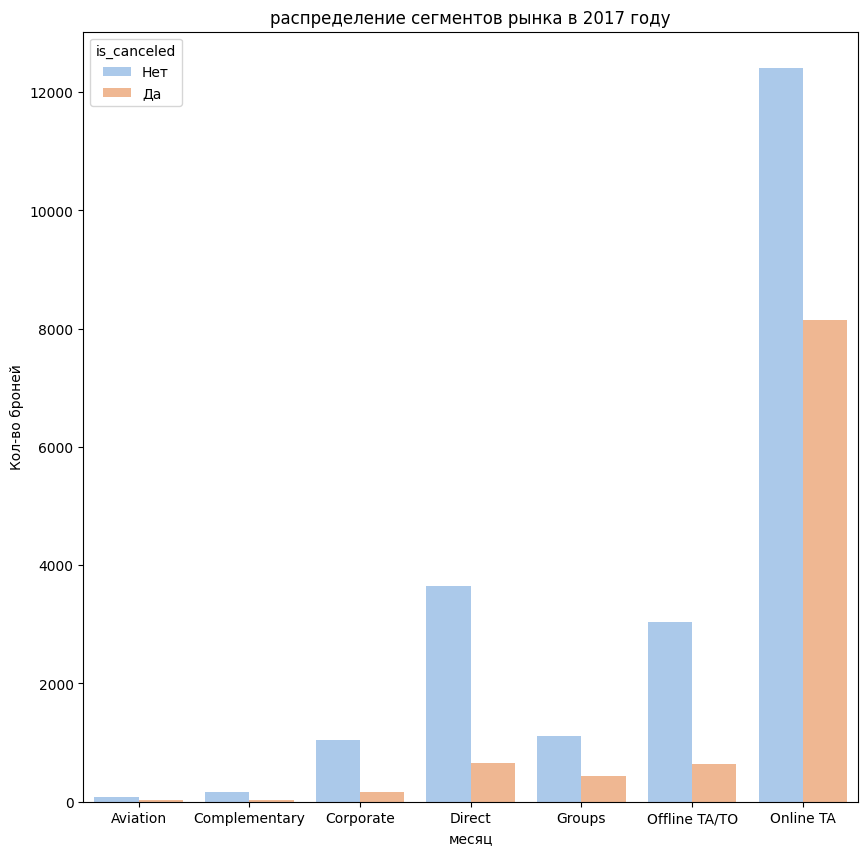

In [ ]:
#посмотрим кол-венное распределение сегментов по месяцам

# market_segment
# distribution_channel



month_order = []
for n in range(1,13,1):
    month_order.append(str(n))

market_group = df.drop(columns = 'reservation_status_date')
market_group['market_segment'] = market_group['market_segment'].replace({0: 'Aviation', 1: 'Complementary', 2: 'Corporate', 3: 'Direct', 4: 'Groups', 5: 'Offline TA/TO', 6: 'Online TA'})
market_group['is_canceled'] = market_group['is_canceled'].replace({0: 'Нет', 1: 'Да'})
market_group = market_group.groupby(by=['arrival_date_year', 'market_segment'])['is_canceled'].value_counts().reset_index()

for i in market_group['arrival_date_year'].unique():
  market_group1 = market_group[market_group['arrival_date_year'] == i]
  ax = plt.figure(figsize = (10,10))
  plt.title(f'распределение сегментов рынка в {i} году')
  ax = sns.barplot(x = 'market_segment', y = 'count', hue = 'is_canceled' ,data = market_group1 , palette = 'pastel', errorbar=('ci', 0))
  ax.set(xlabel='месяц', ylabel= 'Кол-во броней')



In [ ]:
#is_repeated_guest

guest_df = df.groupby(by=['arrival_date_year',])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,nights_total,earnings
0,1,0,342,2015,7,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,0.0,0,2,0.0,0,0,1,2015-07-01,0,0.0
1,1,0,737,2015,7,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,0.0,0,2,0.0,0,0,1,2015-07-01,0,0.0
2,1,0,7,2015,7,27,1,0,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,0.0,0,2,75.0,0,0,1,2015-07-02,1,75.0
3,1,0,13,2015,7,27,1,0,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,304.0,0,2,75.0,0,0,1,2015-07-02,1,75.0
4,1,0,14,2015,7,27,1,0,2,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,240.0,0,2,98.0,0,1,1,2015-07-03,2,196.0
